# NASA Asteroid Classification 

## Introduction
Nasa regularly monitors asteroids that are near earth including their distance from earth, speed, and other important data points. This data is then used to predict whether the asteroid is a potential risk to us. In this project we will attempt to build a classification model that aims to predict whether an asteroid is potentially hazardous and needs further analysis. In the upcoming analysis, I will take you through the following phases to reach the projects conclusion.

1. Data Preprocessing
    - Data Cleaning
    - Exploratory Analysis
2. Data Modeling
    - Logistics Regression
    - Random Forest Classifier
    - AdaBoost Classifier
    - XGBoost Classifier
3. Data Evaluation
    - Cross Validation
    - ROC AUC Curves
4. Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(37)

from sklearn.model_selection import train_test_split

# Simple Models
from sklearn.linear_model import LogisticRegression

# Better Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

## Load Data and Exploratory Analysis

This dataset was obtained via a Kaggle Dataset which was further pulled from a NASA dataset via their API.  
- **Kaggle Dataset:** https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification
- **NASA Dataset:** https://cneos.jpl.nasa.gov/

In [2]:
df = pd.read_csv('nasa.csv')
pd.set_option('display.max_columns', None)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## Data
This dataset containts 4,687 data entries with a total of 40 columns. Of these, there are no blanks, but some of the columns do not appear to be necessary for a Classification Model. 

The dataset consists of approximately 84% Not Hazardous Occurrences and 16% Hazardous occurrences. This does lead to some challenges due to the model having a higher chance of predicting correctly by just predicting False. This is inversely related with the magnitude of the decision. A False Negative in this model will have a drastically worse impact then a False Positive, so this will need to be taken into account when developing our Model.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

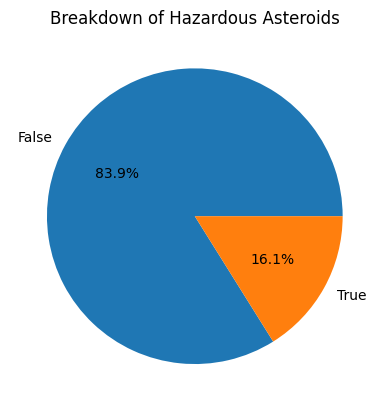

In [4]:
hazardous_counts = df['Hazardous'].value_counts()
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%')
plt.title('Breakdown of Hazardous Asteroids')
plt.show() 

## Data Cleaning and Exploratory Data Analysis
1. columns not useful for classification (IDs, names, Dates)
2. columns that have same metric in various formats (collinearity)
3. dataset is not evenly distributed between false and true

Lets start by checking how many unique values there are per columns.

In [5]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

Neo Reference ID: 3692
Name: 3692
Absolute Magnitude: 269
Est Dia in KM(min): 269
Est Dia in KM(max): 269
Est Dia in M(min): 269
Est Dia in M(max): 269
Est Dia in Miles(min): 269
Est Dia in Miles(max): 269
Est Dia in Feet(min): 269
Est Dia in Feet(max): 269
Close Approach Date: 777
Epoch Date Close Approach: 777
Relative Velocity km per sec: 4687
Relative Velocity km per hr: 4687
Miles per hour: 4687
Miss Dist.(Astronomical): 4673
Miss Dist.(lunar): 4660
Miss Dist.(kilometers): 4661
Miss Dist.(miles): 4660
Orbiting Body: 1
Orbit ID: 188
Orbit Determination Date: 2680
Orbit Uncertainity: 10
Minimum Orbit Intersection: 3678
Jupiter Tisserand Invariant: 2495
Epoch Osculation: 429
Eccentricity: 3692
Semi Major Axis: 3692
Inclination: 3692
Asc Node Longitude: 3692
Orbital Period: 3692
Perihelion Distance: 3692
Perihelion Arg: 3692
Aphelion Dist: 3692
Perihelion Time: 3692
Mean Anomaly: 3692
Mean Motion: 3692
Equinox: 1
Hazardous: 2


Some things stand out. Orbiting Body and Equinox both only have 1 option and as such are not necessary for this dataset. The bigger call out is that Neo Reference/Name only have 3692 values of the total dataset. This is repeated in a good number of rows indicating potential duplicates. Further analysis is necessary to determine if these duplicates should be left because they may be significantly different or not. (for example: `Relative Velocity` and `Miss Dist` are unique, and may be important to this model, if they are significantly important then they should be left in the dataset).

In [6]:
df = df.drop(columns=['Orbit ID', 'Close Approach Date',  'Orbit Determination Date', 'Equinox', 'Orbiting Body'])

### Correlation Matrix
The below correlation matrix shows that a number of variables are perfectly correlated with each other. Many of these make sense, Name and ID and the various distance formats being perfectly correlated makes sense. As these are a good sign of collinearity, we will need to remove these.

<Axes: >

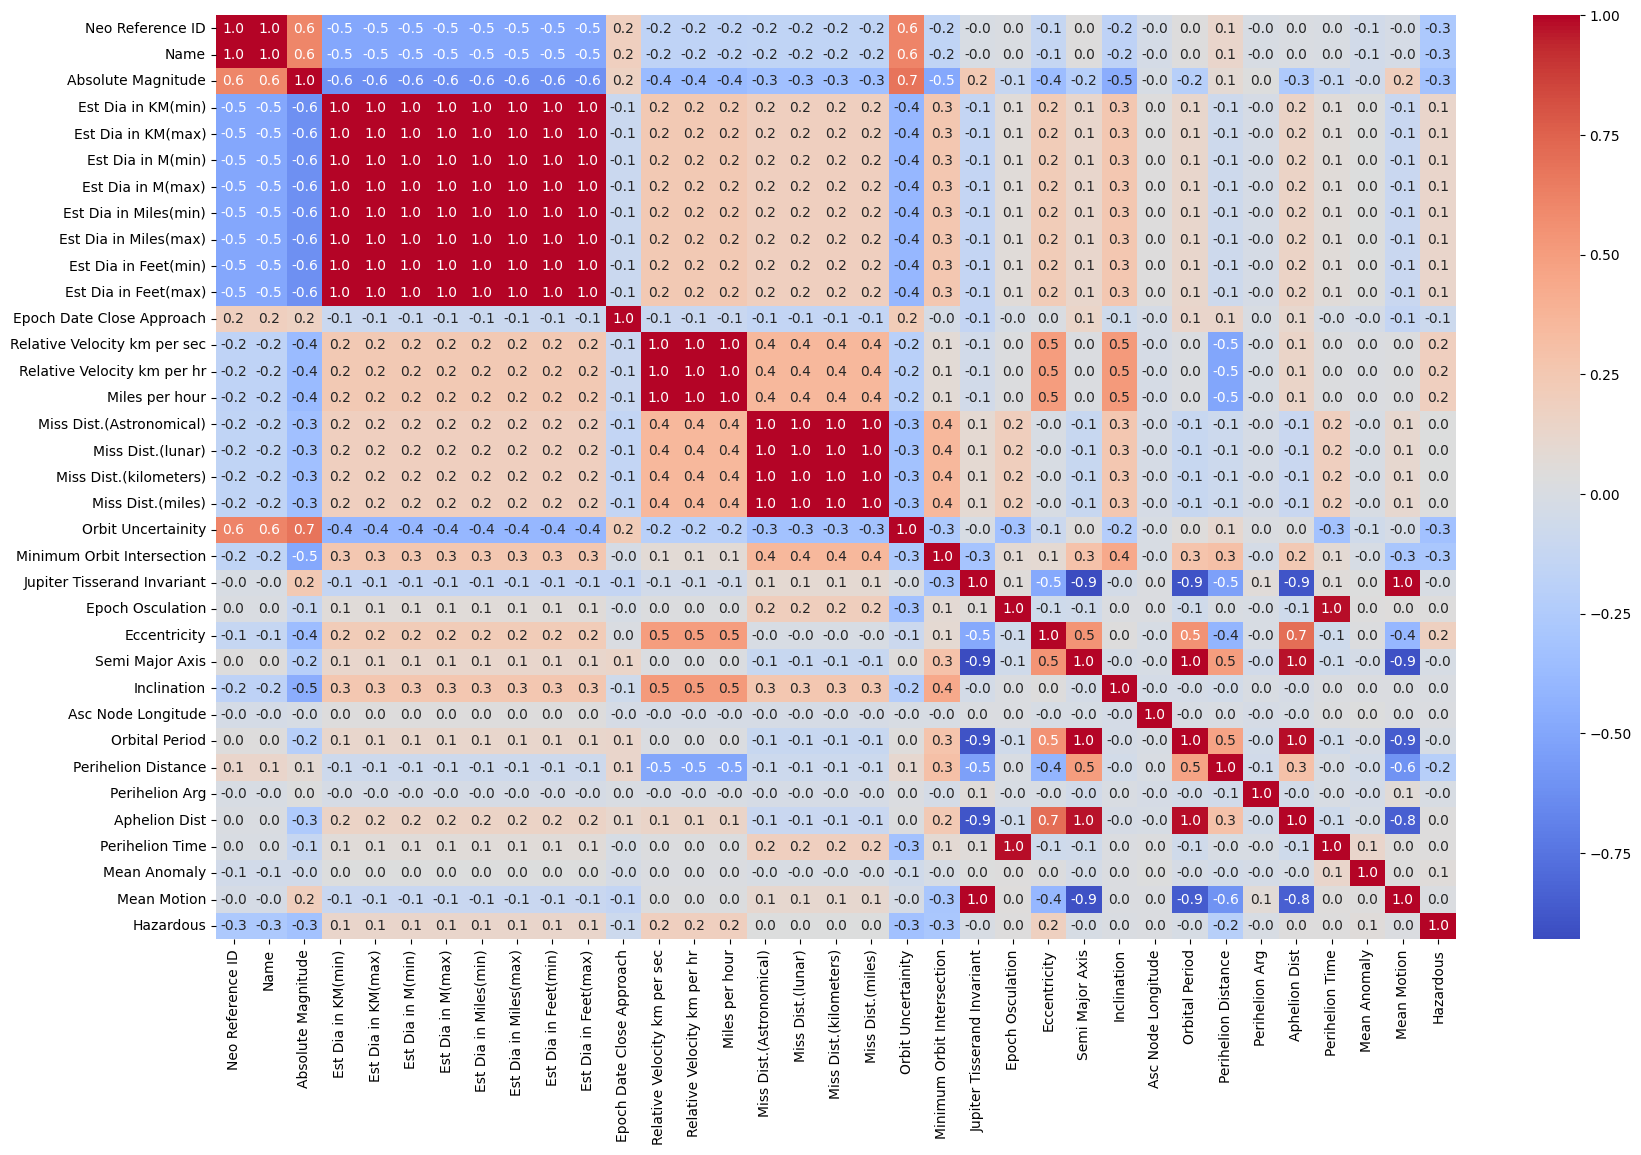

In [7]:
correlation = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation, annot=True, fmt = ".1f", cmap = 'coolwarm')

### Checking Attributes not in Dist
We still see a few values with high correlation, namely `Orbital Period`, `Aphelion Distance`, and `Semi Major Axis`, as well as a few other variables. After checking the data for these rows, I  determined that they are significantly different enough and should all be included in the analysis.

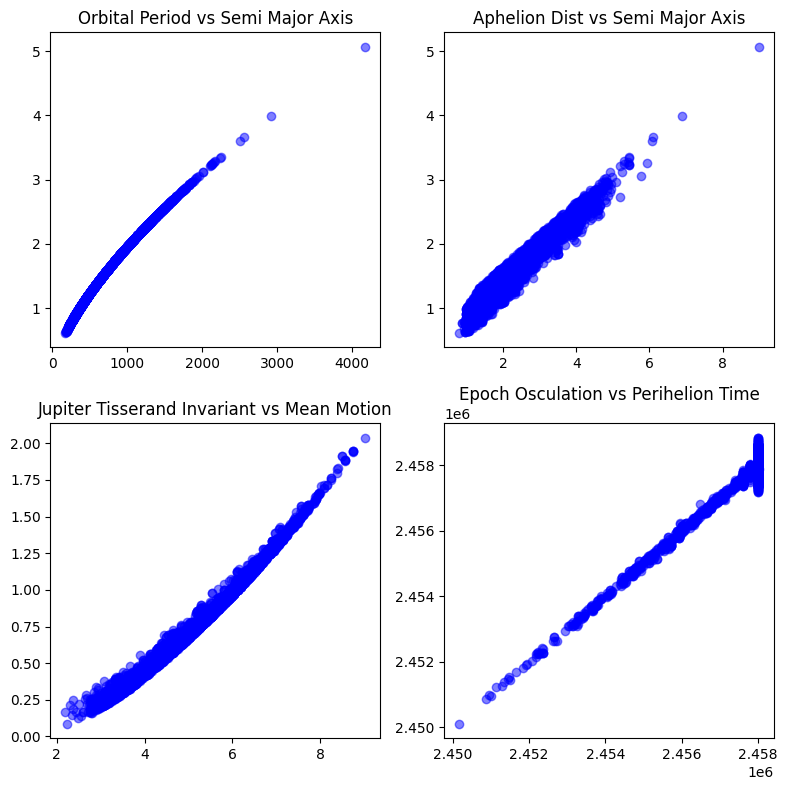

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].scatter(df['Orbital Period'], df['Semi Major Axis'], color='blue', alpha=0.5)
axes[0, 0].set_title('Orbital Period vs Semi Major Axis')

axes[0, 1].scatter(df['Aphelion Dist'], df['Semi Major Axis'], color='blue', alpha=0.5)
axes[0, 1].set_title('Aphelion Dist vs Semi Major Axis')

axes[1, 0].scatter(df['Jupiter Tisserand Invariant'], df['Mean Motion'], color='blue', alpha=0.5)
axes[1, 0].set_title('Jupiter Tisserand Invariant vs Mean Motion')

axes[1, 1].scatter(df['Epoch Osculation'], df['Perihelion Time'], color='blue', alpha=0.5)
axes[1, 1].set_title('Epoch Osculation vs Perihelion Time')

plt.tight_layout()
plt.show()

### Checking Names
After manually checking some of the name values, I think we can leave them in the dataset. They are the same asteroid being recorded at different time periods with different distances from the earth and speeds. This seems amply different enough to leave them in the dataset. We will still be dropping `Neo Reference ID` and `Name` from the dataset as they are not needed for classification.

In [9]:
duplicates = df[df.duplicated('Name', keep=False)]
duplicates_sorted = duplicates.sort_values('Name')
duplicates_sorted.head(20)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
3502,2002062,2002062,16.80,1.160259,2.594418,1160.259082,2594.418179,0.720951,1.612096,3806.624407,8511.870939,1354953600000,10.154438,36555.977329,22714.462691,0.297612,115.770958,44522080.0,27664738.0,0,0.113146,6.184,2455926.5,0.182717,0.966790,18.933687,108.600376,347.213448,0.790141,148.035406,1.143439,2.455760e+06,172.267763,1.036826,False
4468,2002062,2002062,16.80,1.160259,2.594418,1160.259082,2594.418179,0.720951,1.612096,3806.624407,8511.870939,1453449600000,19.751365,71104.915274,44181.829160,0.440523,171.363358,65901268.0,40949148.0,0,0.113146,6.184,2455926.5,0.182717,0.966790,18.933687,108.600376,347.213448,0.790141,148.035406,1.143439,2.455760e+06,172.267763,1.036826,False
3783,2002062,2002062,16.80,1.160259,2.594418,1160.259082,2594.418179,0.720951,1.612096,3806.624407,8511.870939,1389168000000,10.252167,36907.802127,22933.072939,0.146281,56.903175,21883276.0,13597637.0,0,0.113146,6.184,2455926.5,0.182717,0.966790,18.933687,108.600376,347.213448,0.790141,148.035406,1.143439,2.455760e+06,172.267763,1.036826,False
866,2002100,2002100,16.05,1.638910,3.664713,1638.909515,3664.713084,1.018371,2.277146,5376.999893,12023.337276,960447600000,7.664620,27592.630801,17144.987733,0.423509,164.744934,63356020.0,39367604.0,0,0.149558,6.946,2453681.5,0.436512,0.832041,15.755971,170.884866,277.214385,0.468845,355.982774,1.195238,2.453601e+06,104.564616,1.298634,False
1999,2002100,2002100,16.05,1.638910,3.664713,1638.909515,3664.713084,1.018371,2.277146,5376.999893,12023.337276,1155020400000,15.284840,55025.424400,34190.658845,0.214042,83.262337,32020226.0,19896446.0,0,0.149558,6.946,2453681.5,0.436512,0.832041,15.755971,170.884866,277.214385,0.468845,355.982774,1.195238,2.453601e+06,104.564616,1.298634,False
2940,2002100,2002100,16.05,1.638910,3.664713,1638.909515,3664.713084,1.018371,2.277146,5376.999893,12023.337276,1286521200000,23.322922,83962.519773,52171.044578,0.400535,155.808182,59919208.0,37232072.0,0,0.149558,6.946,2453681.5,0.436512,0.832041,15.755971,170.884866,277.214385,0.468845,355.982774,1.195238,2.453601e+06,104.564616,1.298634,False
315,2003362,2003362,18.30,0.581507,1.300289,581.507040,1300.289270,0.361332,0.807962,1907.831556,4266.041049,857808000000,17.171795,61818.460651,38411.587397,0.426246,165.809601,63765460.0,39622020.0,1,0.013395,6.017,2458000.5,0.468568,0.989527,9.916829,152.447807,359.533785,0.525866,55.048204,1.453187,2.458084e+06,276.531946,1.001297,True
1683,2003362,2003362,18.30,0.581507,1.300289,581.507040,1300.289270,0.361332,0.807962,1907.831556,4266.041049,1103097600000,21.812555,78525.198439,48792.504552,0.267436,104.032791,40007928.0,24859774.0,1,0.013395,6.017,2458000.5,0.468568,0.989527,9.916829,152.447807,359.533785,0.525866,55.048204,1.453187,2.458084e+06,276.531946,1.001297,True
276,2003362,2003362,18.30,0.581507,1.300289,581.507040,1300.289270,0.361332,0.807962,1907.831556,4266.041049,848044800000,11.241633,40469.877391,25146.407982,0.445018,173.112167,66573808.0,41367044.0,1,0.013395,6.017,2458000.5,0.468568,0.989527,9.916829,152.447807,359.533785,0.525866,55.048204,1.453187,2.458084e+06,276.531946,1.001297,True
140,2003362,2003362,18.30,0.581507,1.300289,581.507040,1300.289270,0.361332,0.807962,1907.831556,4266.041049,815817600000,11.647107,41929.584232,26053.413047,0.468674,182.314072,70112592.0,43565944.0,1,0.013395,6.017,2458000.5,0.468568,

Before dropping Diameter columns, we will average 1 of them to use the midpoint instead of the min or Max. 

In [10]:
df['Est Dia in M'] = (df['Est Dia in M(max)'] + df['Est Dia in M(min)'])/2

In [11]:
df = df.drop(columns=['Neo Reference ID', 'Name', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)' ,'Est Dia in M(max)', 'Est Dia in Miles(min)',
                      'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per hr', 
                      'Miles per hour', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Epoch Date Close Approach'])

# Reorder Columns
columns_except_specific = [col for col in df.columns if col != 'Hazardous']
new_column_order = columns_except_specific + ['Hazardous']
df = df[new_column_order]

### Correlation Matrix pt 2
After rerunning the Correlation Matrix, the dataset consisting of 19 remaining attribute columns appears good to continue on to further analysis.

<Axes: >

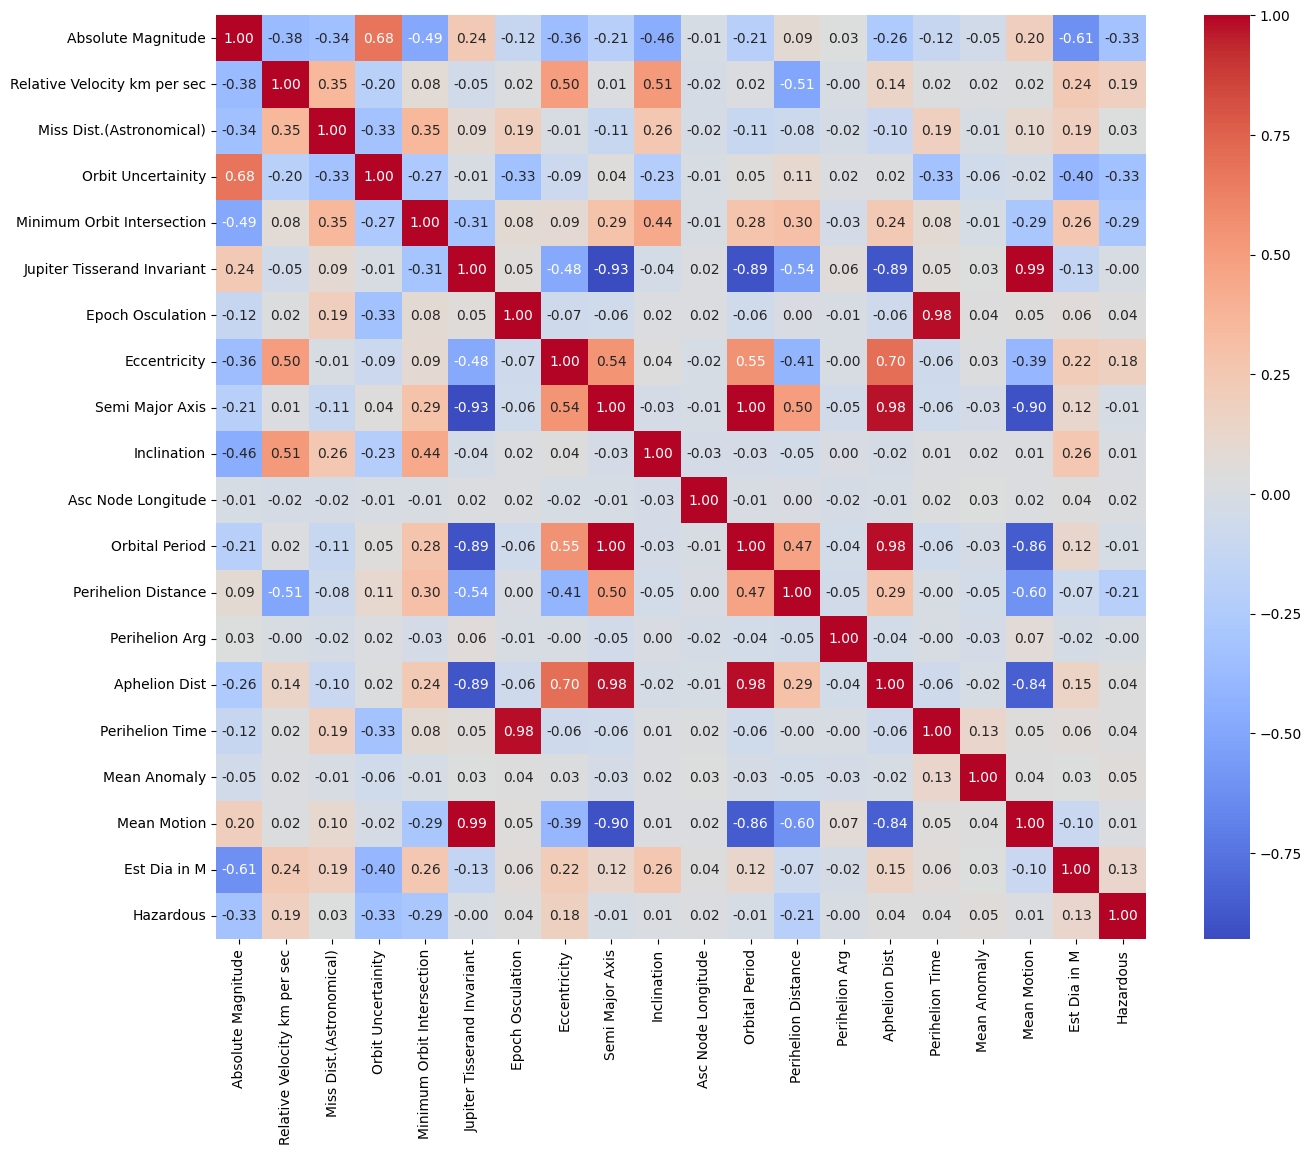

In [12]:
correlation = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, fmt = ".2f", cmap = 'coolwarm')

### Data Distribution
When checking the data Distributions below, we see that the Data is spread out similarly between Hazardous and Not Hazardous. However, Many of the attributes do not appear to be normally distributed. It will be good to check for outliers and potentially remove them. More data collection would likely be necessary to have accurate predictions for major outliers.

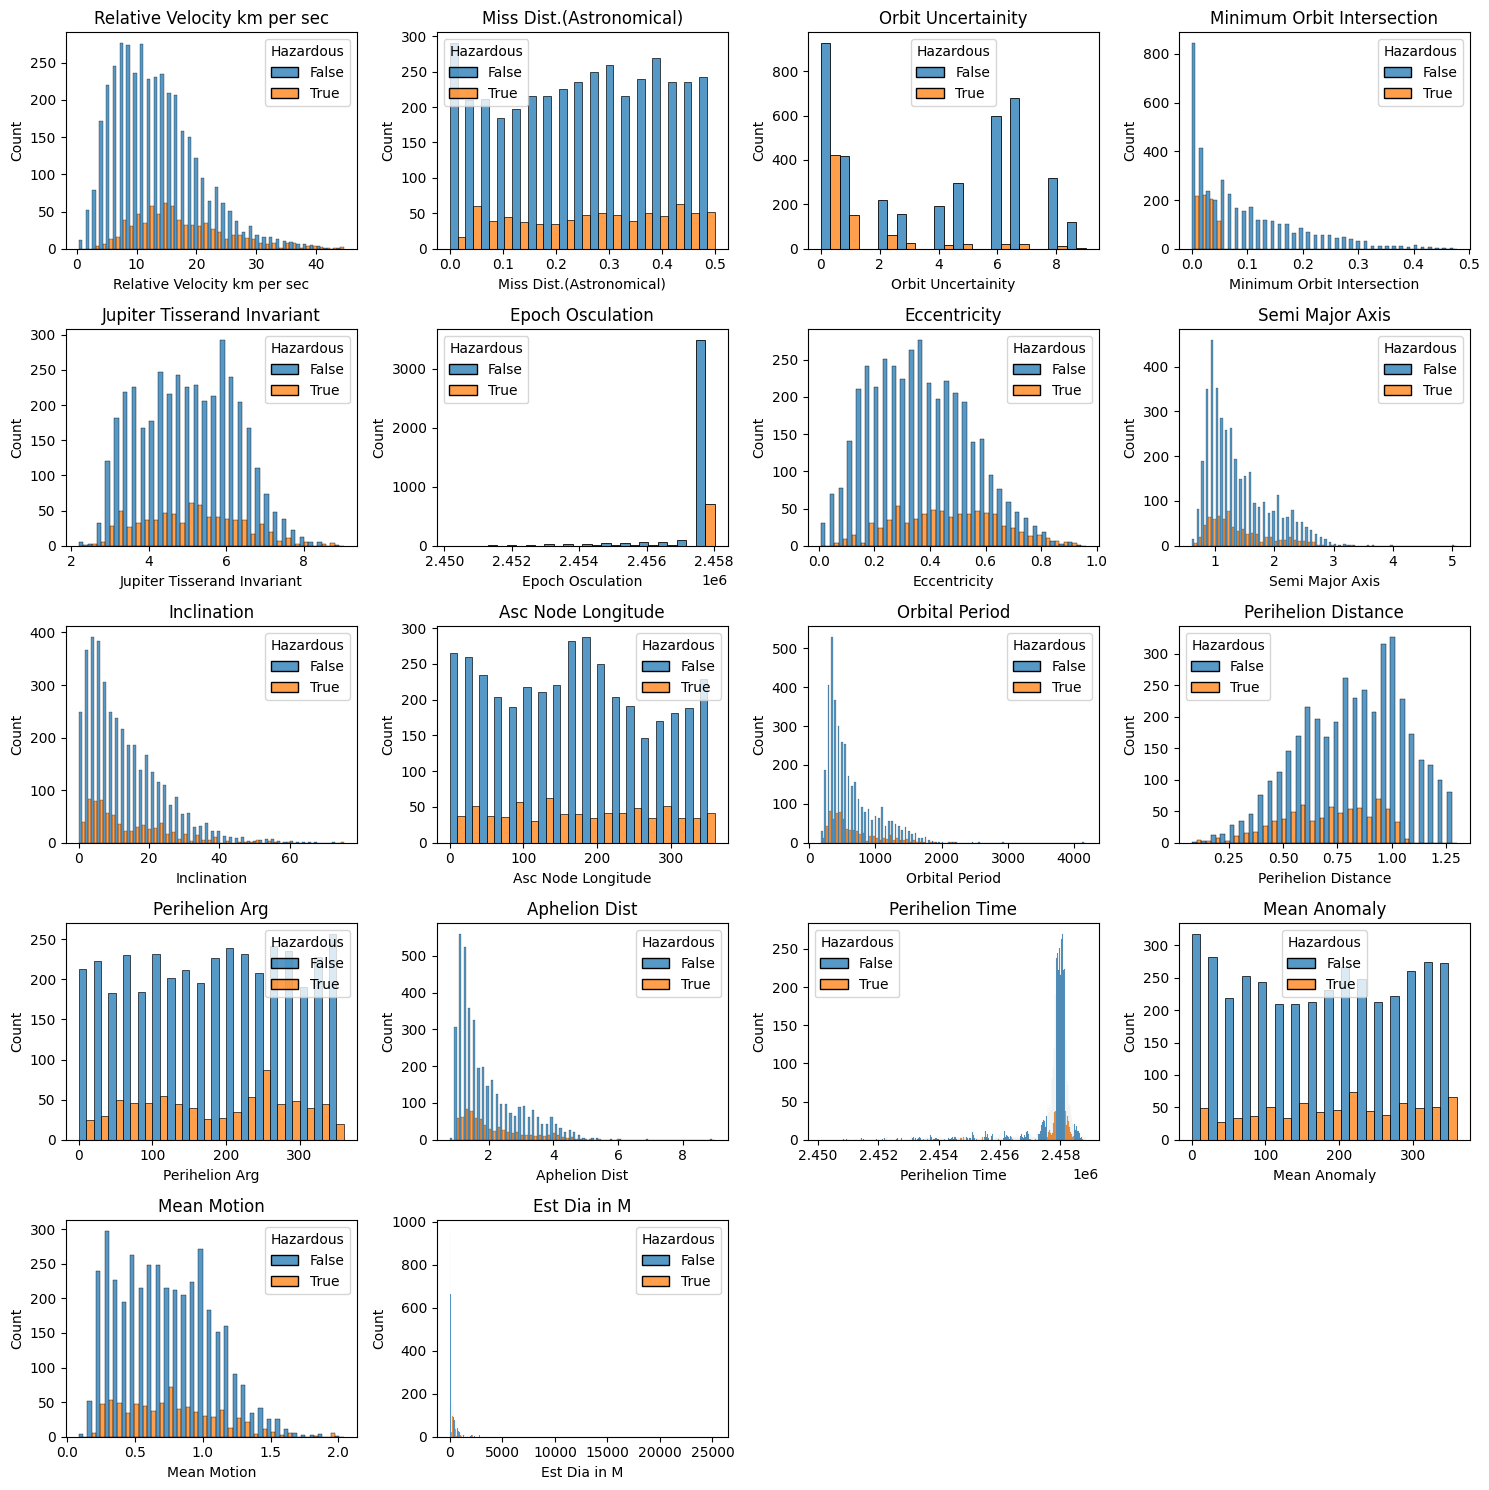

In [13]:
plt.figure(figsize = (15, 15))
for i, col in enumerate(df.columns[1:-1], 1):
    plt.subplot(5, 4, i)
    sns.histplot(x = df[col], hue = df["Hazardous"], multiple = "dodge")
    plt.title(col)

plt.tight_layout()
plt.show()

## Outliers

There are currently 4,687 entries in the dataset prior to outlier removal.

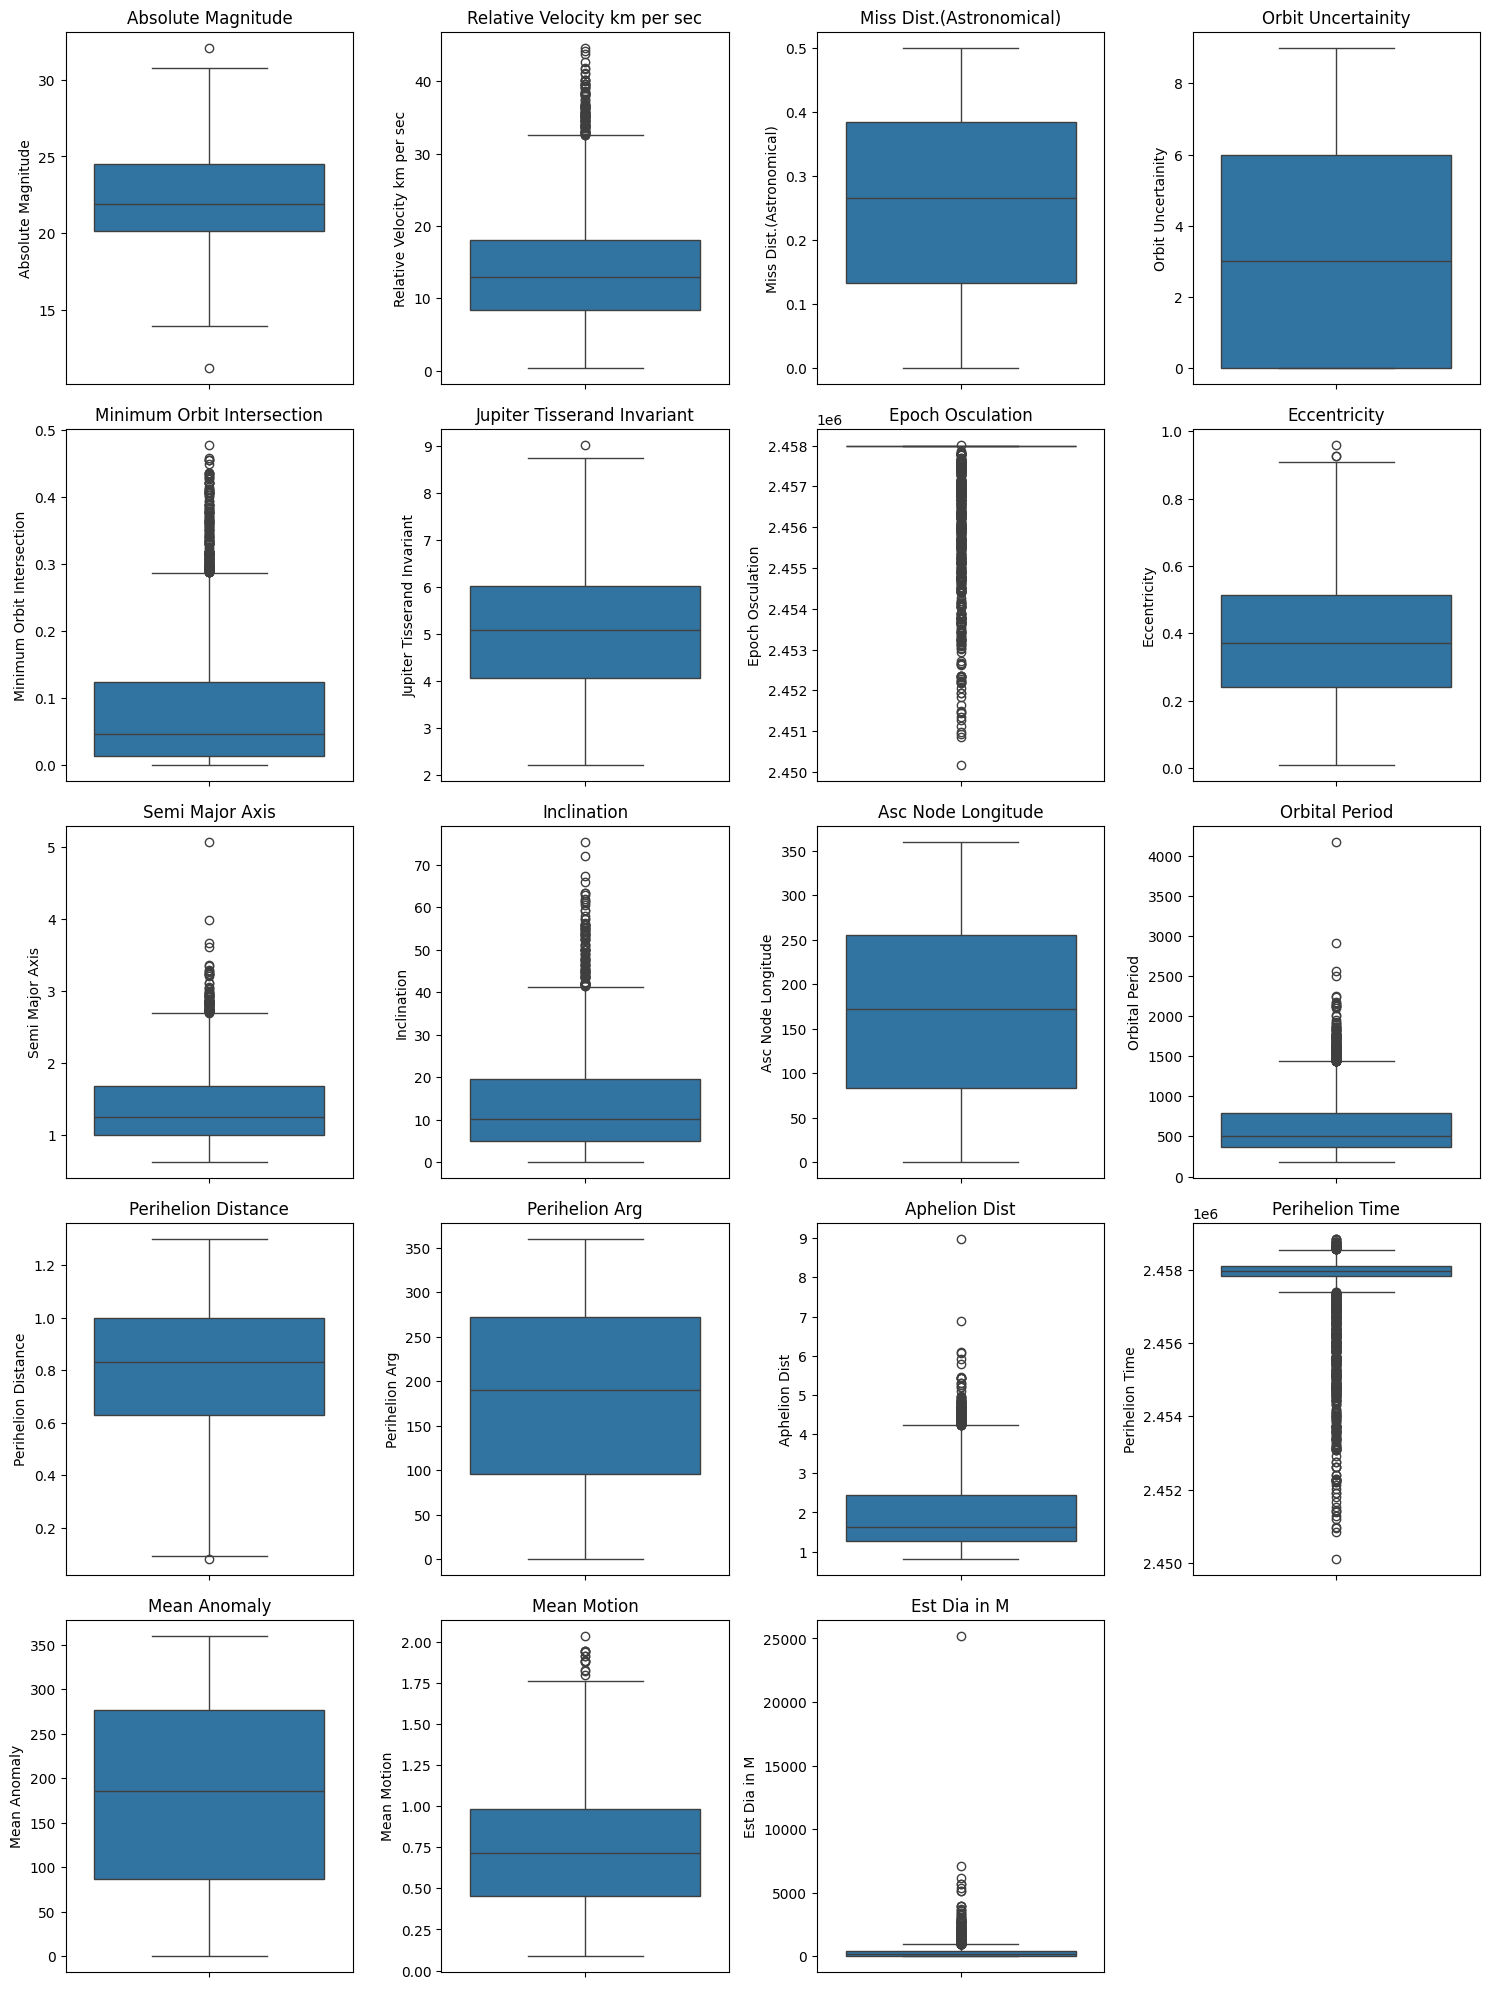

In [14]:
attribute_columns = df.columns[:-1]

plt.figure(figsize=(15, 20))

for i, column in enumerate(attribute_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

For now lets check on how many outliers would be removed if we remove based off Standard IQR method.

In [15]:
robust_scaler = RobustScaler()
df[attribute_columns] = robust_scaler.fit_transform(df[attribute_columns])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for column in attribute_columns :
    outlier_count = count_outliers(df[column])
    print(f'Outliers in {column}: {outlier_count}')

Outliers in Absolute Magnitude: 2
Outliers in Relative Velocity km per sec: 101
Outliers in Miss Dist.(Astronomical): 0
Outliers in Orbit Uncertainity: 0
Outliers in Minimum Orbit Intersection: 197
Outliers in Jupiter Tisserand Invariant: 1
Outliers in Epoch Osculation: 639
Outliers in Eccentricity: 3
Outliers in Semi Major Axis: 86
Outliers in Inclination: 103
Outliers in Asc Node Longitude: 0
Outliers in Orbital Period: 220
Outliers in Perihelion Distance: 1
Outliers in Perihelion Arg: 0
Outliers in Aphelion Dist: 146
Outliers in Perihelion Time: 553
Outliers in Mean Anomaly: 0
Outliers in Mean Motion: 14
Outliers in Est Dia in M: 310


Removing all of these outliers may be a problem especially in the case of the following 3 columns: `Epoch Osculation`, `Est Diameter`, and `Perihelion Time`. After Further Analysis, I will not be removing any outliers as many of these should be predicted for. 

In [16]:
def clean_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    data_out = data[((data[column] > upper_limit) | (data[column] < lower_limit))]
    data = data[~((data[column] > upper_limit) | (data[column] < lower_limit))]
    return data, data_out

df_cleaned = df.copy()
df_outliers = pd.DataFrame()
cols = []

'''cols = ['Absolute Magnitude', 'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist',  
        'Mean Anomaly', 'Mean Motion']'''

for column in cols:
    df_cleaned, temp_outliers = clean_outliers(df_cleaned, column)
    
    df_outliers = pd.concat([df_outliers, temp_outliers]).reset_index(drop=True)
    
print(df_cleaned.shape)
print(df_outliers.shape)

(4687, 20)
(0, 0)


In [17]:
df_outliers
df = df_cleaned.copy()

In [18]:
df.describe()

,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Est Dia in M
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,0.083606,0.109170,-0.032905,0.086160,0.320659,-0.007560,-276.891828,0.037263,0.235024,0.210457,-0.002722,0.304801,-0.053956,-0.033094,0.311320,-0.834715,-0.024012,0.047605,0.425640
std,0.657039,0.756183,0.581484,0.513051,0.828376,0.628494,920.297473,0.664490,0.773398,0.751665,0.600636,0.865522,0.660655,0.587636,0.802894,3.221473,0.567216,0.644787,1.677022
min,-2.440909,-1.304579,-1.056300,-0.500000,-0.434493,-1.459761,-7836.000000,-1.343859,-0.922287,-0.707752,-1.003942,-0.766209,-2.053557,-1.077224,-0.687217,-26.858899,-0.979901,-1.179307,-0.498212
25%,-0.409091,-0.465021,-0.524894,-0.500000,-0.300714,-0.518660,0.000000,-0.484592,-0.354634,-0.367680,-0.520770,-0.325117,-0.552190,-0.534402,-0.297133,-0.537796,-0.520839,-0.488646,-0.350955
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.590909,0.534979,0.475106,0.500000,0.699286,0.481340,0.000000,0.515408,0.645366,0.632320,0.479230,0.674883,0.447810,0.465598,0.702867,0.462204,0.479161,0.511354,0.649045
max,2.318182,3.288395,0.936670,1.000000,3.949471,2.007616,19.000000,2.164631,5.652745,4.474074,1.089184,8.556607,1.273713,0.966392,6.215152,2.954902,0.919135,2.495488,70.192913


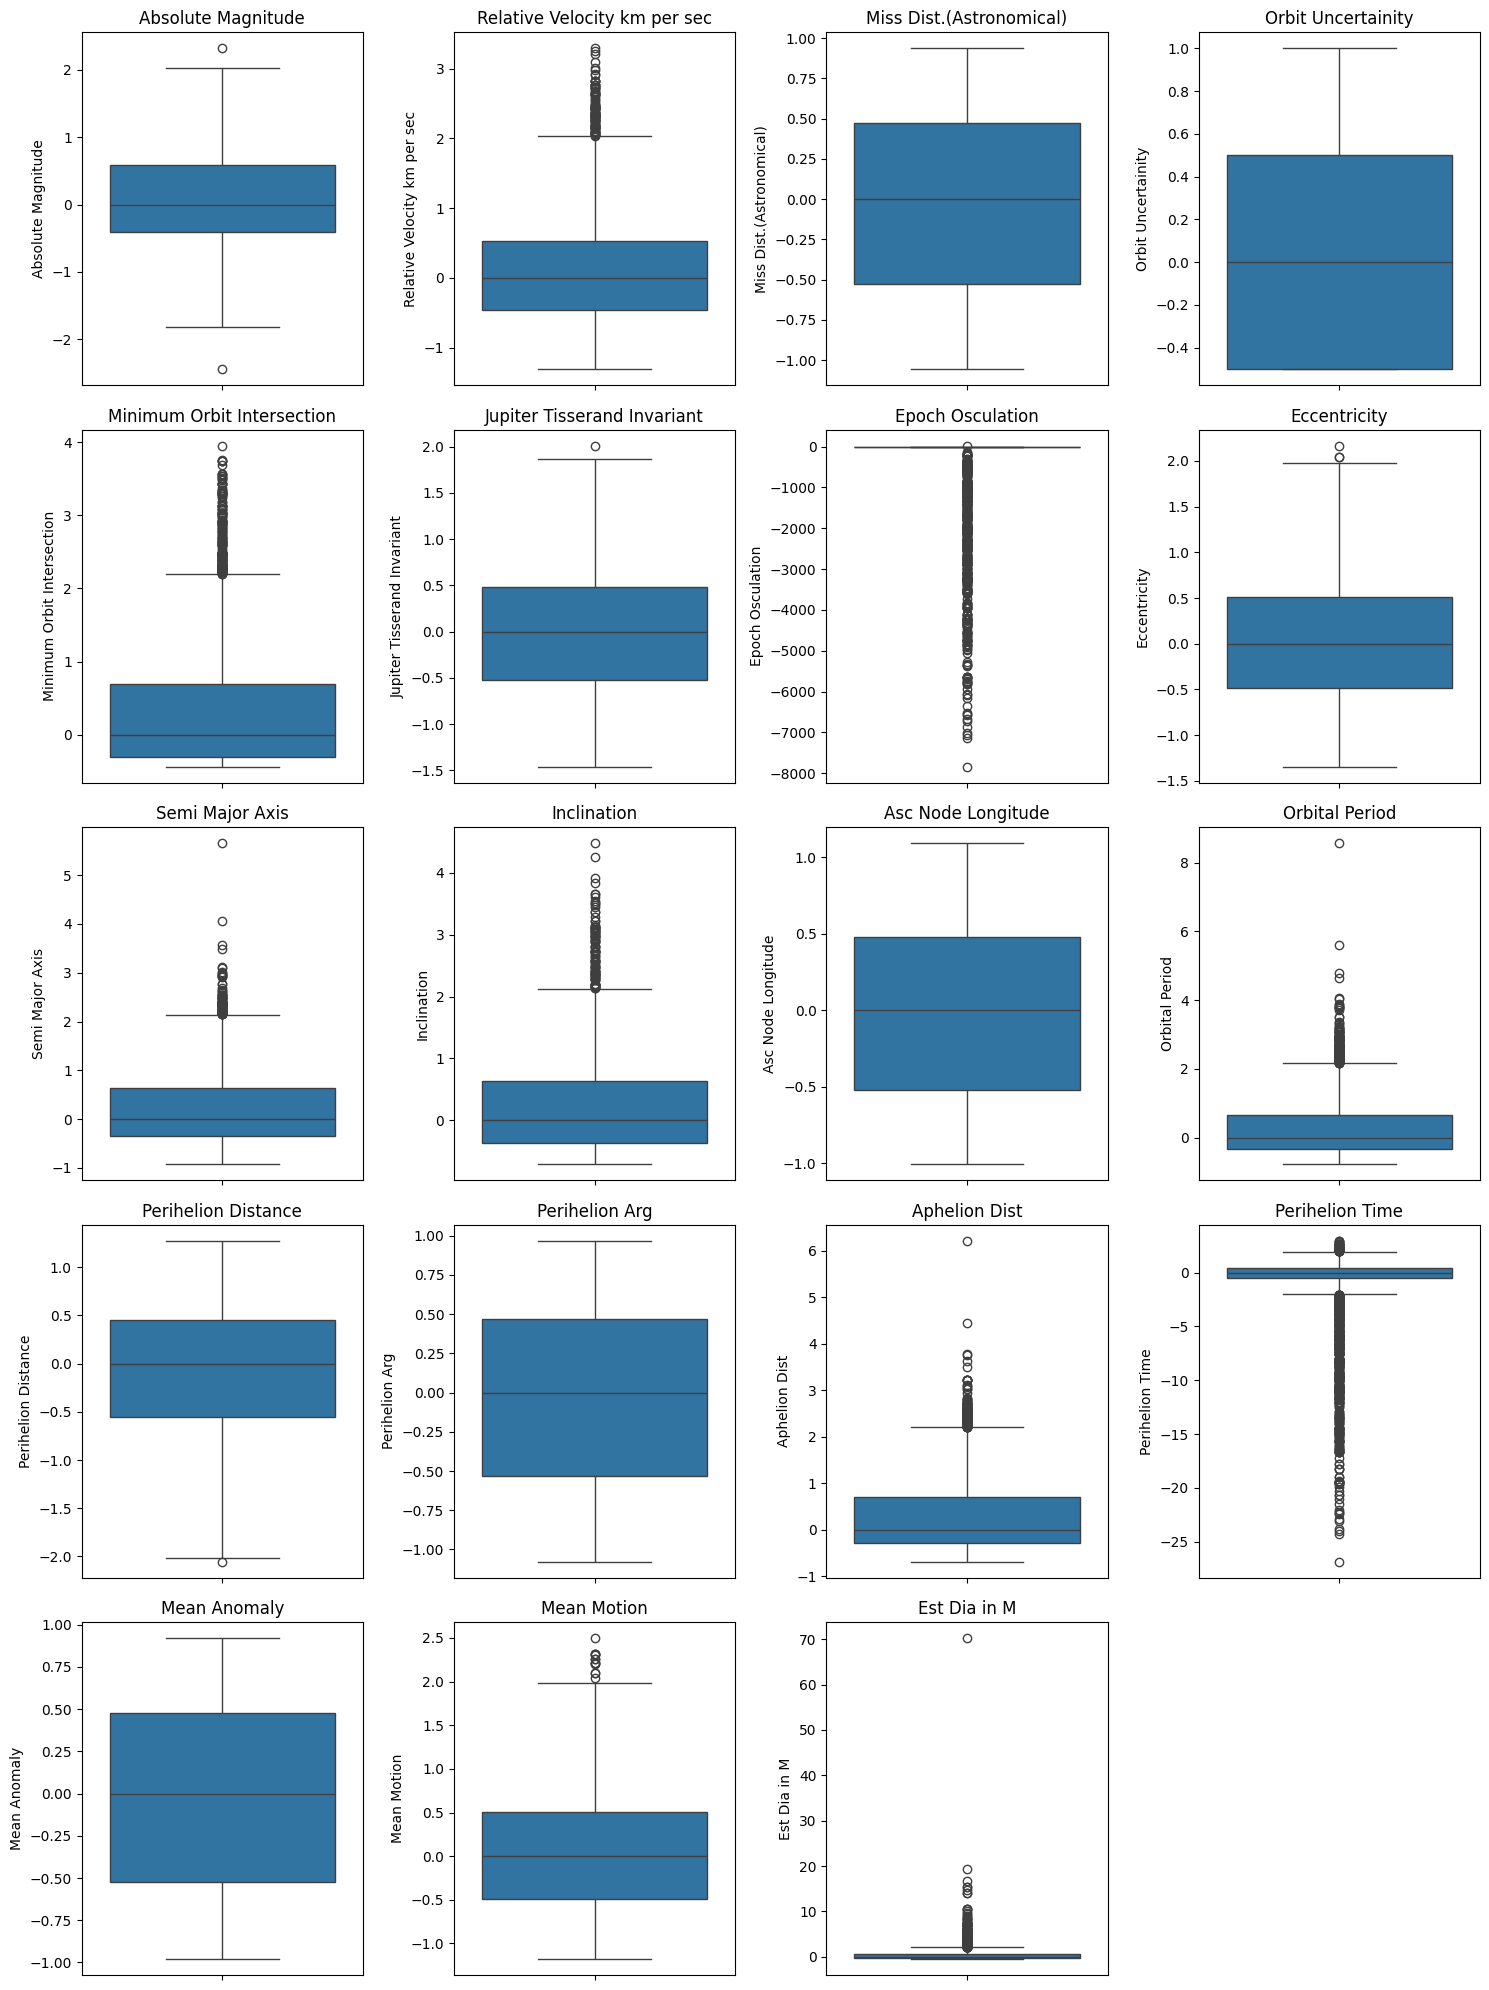

In [19]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(attribute_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Model Preprocessing

### Split Data

With the Exploratory Analysis and Data Cleaning Complete, it is time to start splitting the dataset. I am checking y_train and y_test to ensure that the data was split including both True and False Data.

In [20]:
X = df.iloc[:, :-1]
y = df['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_Train Shape: {X_train.shape}')
print(f'X_Test Shape: {X_test.shape}')
print(f'y_Train Shape: {y_train.shape}')
print(f'y_Test Shape: {y_test.shape}')

X_Train Shape: (3749, 19)
X_Test Shape: (938, 19)
y_Train Shape: (3749,)
y_Test Shape: (938,)


In [21]:
print(y_train.value_counts())
print(y_test.value_counts())

Hazardous
False    3158
True      591
Name: count, dtype: int64
Hazardous
False    774
True     164
Name: count, dtype: int64


### Evaluation Functions

This step will create common function for creating evaluation metrics for all future models.

In [22]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_probs) * 100
    
    metrics_table = f"""
    | Metric    | Score   |
    |-----------|---------|
    | Accuracy  | {accuracy:.2f}% |
    | Precision | {precision:.2f}% |
    | Recall    | {recall:.2f}% |
    | F1 Score  | {f1:.2f}% |
    | AUC       | {auc:.2f}% |
    """
    print(metrics_table)
    
    # Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred) 
    print("Confusion Matrix:")
    print(f"TN: {cm[0][0]}, FP: {cm[0][1]}")
    print(f"FN: {cm[1][0]}, TP: {cm[1][1]}")
       
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'fpr': fpr,
        'tpr': tpr
    }

def plot_roc_curves(model_evals):
    plt.figure(figsize=(10, 7))
    for eval in model_evals:
        plt.plot(eval['fpr'], eval['tpr'], label=f"{eval['model_name']} (AUC = {eval['auc']:.2f}%)")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve Comparison')
    plt.legend(loc="lower right")
    plt.show()

def compare_models(model_evals):
    data = []

    for eval in model_evals:
        data.append([
            eval['model_name'],
            f"{eval['accuracy']:.2f}%",
            f"{eval['precision']:.2f}%",
            f"{eval['recall']:.2f}%",
            f"{eval['f1']:.2f}%",
            f"{eval['auc']:.2f}%"
        ])
    
    df = pd.DataFrame(data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    return df

## Modeling

### Logistics Regression
Logistics Regression was chosen for it's simple and easy to implement nature. This also allowed easy hyperparameter tuning and balancing. With Balancing and tuning we reduced false negatives from 36 total misclassifications to only 7. This is especially important due to a False Negative could lead to catastrophic results.

In [23]:
logr = LogisticRegression(max_iter = 1000)
logr.fit(X_train, y_train)
logr_eval = evaluate_model(logr, X_test, y_test, 'Logistics Regression')


    | Metric    | Score   |
    |-----------|---------|
    | Accuracy  | 94.35% |
    | Precision | 88.28% |
    | Recall    | 78.05% |
    | F1 Score  | 82.85% |
    | AUC       | 98.57% |
    
Confusion Matrix:
TN: 757, FP: 17
FN: 36, TP: 128


In [24]:
logr = LogisticRegression(class_weight='balanced', max_iter = 10000)

# hyperparameter tuning
param_grid = {
    'C': np.logspace(-4, 4, 20), 
    'solver': ['liblinear', 'lbfgs'] 
}

grid_search = GridSearchCV(logr, param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
print(best_estimator)

logr_eval_tuned = evaluate_model(best_estimator, X_test, y_test, 'Logistic Regression Tuned')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
LogisticRegression(C=0.08858667904100823, class_weight='balanced',
                   max_iter=10000, solver='liblinear')

    | Metric    | Score   |
    |-----------|---------|
    | Accuracy  | 91.47% |
    | Precision | 68.26% |
    | Recall    | 95.73% |
    | F1 Score  | 79.70% |
    | AUC       | 97.97% |
    
Confusion Matrix:
TN: 701, FP: 73
FN: 7, TP: 157


### Random Forest
Random Forest was chosen for it's robustness and ability to quickly and accurately classify. Interestingly, parameter tuning had little to no effect. 

In [25]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_eval = evaluate_model(rf_clf, X_test, y_test, 'Random Forest')


    | Metric    | Score   |
    |-----------|---------|
    | Accuracy  | 99.68% |
    | Precision | 98.79% |
    | Recall    | 99.39% |
    | F1 Score  | 99.09% |
    | AUC       | 99.96% |
    
Confusion Matrix:
TN: 772, FP: 2
FN: 1, TP: 163


In [26]:
rf_clf = RandomForestClassifier(class_weight='balanced')

# hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3 , 4] 
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='recall', verbose=1) 


rf_clf.fit(X_train, y_train)
rf_eval_tuned = evaluate_model(rf_clf, X_test, y_test, 'Random Forest Tuned')


    | Metric    | Score   |
    |-----------|---------|
    | Accuracy  | 99.57% |
    | Precision | 98.78% |
    | Recall    | 98.78% |
    | F1 Score  | 98.78% |
    | AUC       | 99.98% |
    
Confusion Matrix:
TN: 772, FP: 2
FN: 2, TP: 162


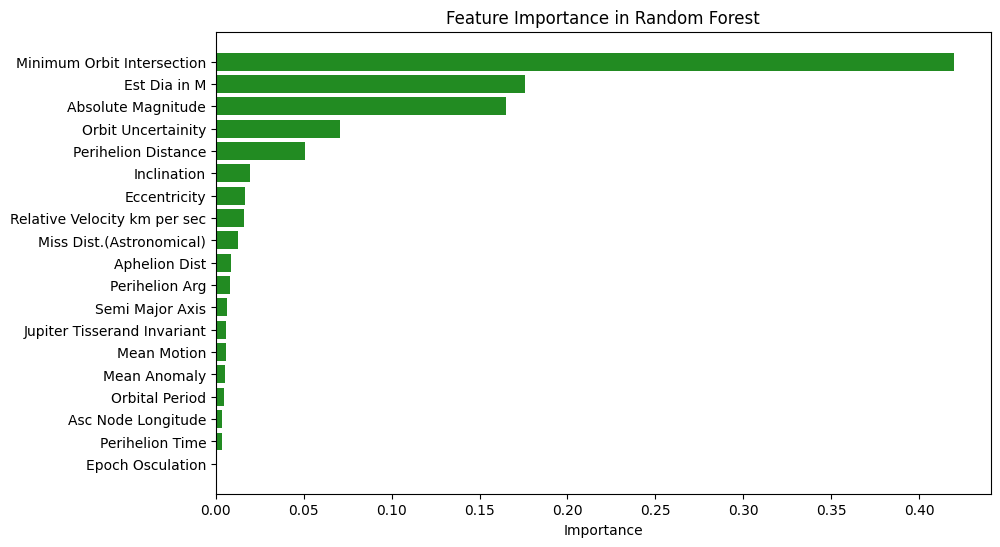

In [27]:
def plot_feature_importance_random_forest(model, feature_names):
    # Extract feature importance
    importance = model.feature_importances_
    
    # Create a DataFrame for visualization
    df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    df = df.sort_values(by='Importance', ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(df['Feature'], df['Importance'], color='forestgreen')
    plt.xlabel('Importance')
    plt.title('Feature Importance in Random Forest')
    plt.gca().invert_yaxis()
    plt.show()

# Usage
plot_feature_importance_random_forest(rf_clf, attribute_columns)


### XG Boost
XG Boost was chosen for its superior accuracy in classification problems and due to its implementation of gradient boosting.

In [28]:
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xg_eval = evaluate_model(xgb_model, X_test, y_test, 'XGBoost')


    | Metric    | Score   |
    |-----------|---------|
    | Accuracy  | 99.68% |
    | Precision | 98.79% |
    | Recall    | 99.39% |
    | F1 Score  | 99.09% |
    | AUC       | 99.75% |
    
Confusion Matrix:
TN: 772, FP: 2
FN: 1, TP: 163


In [29]:
class_counts = np.bincount(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]

xgb_model = XGBClassifier(eval_metric='mlogloss', scale_pos_weight=scale_pos_weight)

# hyperparameter tuning
param_grid = {
    'max_depth': [3, 6, 10],         
    'learning_rate': [0.01, 0.1, 0.2], 
    'n_estimators': [100, 200, 300],  
    'subsample': [0.7, 0.9, 1.0],   
    'colsample_bytree': [0.7, 0.9, 1.0] 
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
xg_eval_tuned = evaluate_model(best_xgb, X_test, y_test, 'XGBoost Tuned')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

    | Metric    | Score   |
    |-----------|---------|
    | Accuracy  | 99.68% |
    | Precision | 98.79% |
    | Recall    | 99.39% |
    | F1 Score  | 99.09% |
    | AUC       | 99.92% |
    
Confusion Matrix:
TN: 772, FP: 2
FN: 1, TP: 163


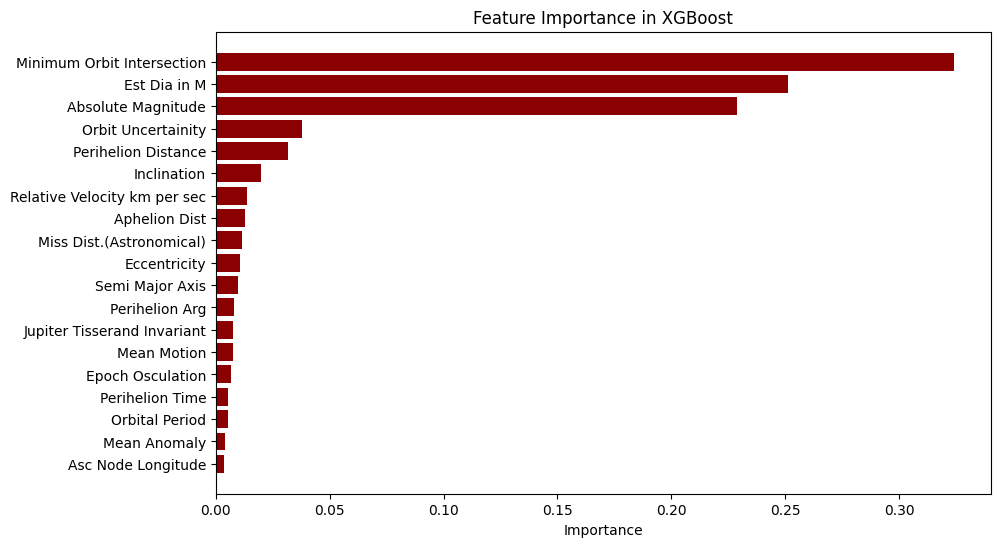

In [30]:
def plot_feature_importance_xgboost(model, feature_names):
    # Extract feature importance
    importance = model.feature_importances_
    
    # Create a DataFrame for visualization
    df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    df = df.sort_values(by='Importance', ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(df['Feature'], df['Importance'], color='darkred')
    plt.xlabel('Importance')
    plt.title('Feature Importance in XGBoost')
    plt.gca().invert_yaxis()
    plt.show()


plot_feature_importance_xgboost(best_xgb, attribute_columns)

## Evaluation
I am prioritizing both AUC and Recall as the primary evaluation metrics. Recall is chosen specifically because I want to minimize False Negatives due to the nature of the dataset. From this we can see that Random Forest and XGBoost have the highest performance. Even without hyperparameter tuning these models performed exceptionally well. Logistics Regression took a small hit when balanced and tuned, but it shows massive improvements in Recall specifically. 

In [31]:
compare_models([logr_eval, logr_eval_tuned, rf_eval, rf_eval_tuned, xg_eval, xg_eval_tuned])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistics Regression,94.35%,88.28%,78.05%,82.85%,98.57%
1,Logistic Regression Tuned,91.47%,68.26%,95.73%,79.70%,97.97%
2,Random Forest,99.68%,98.79%,99.39%,99.09%,99.96%
3,Random Forest Tuned,99.57%,98.78%,98.78%,98.78%,99.98%
4,XGBoost,99.68%,98.79%,99.39%,99.09%,99.75%
5,XGBoost Tuned,99.68%,98.79%,99.39%,99.09%,99.92%


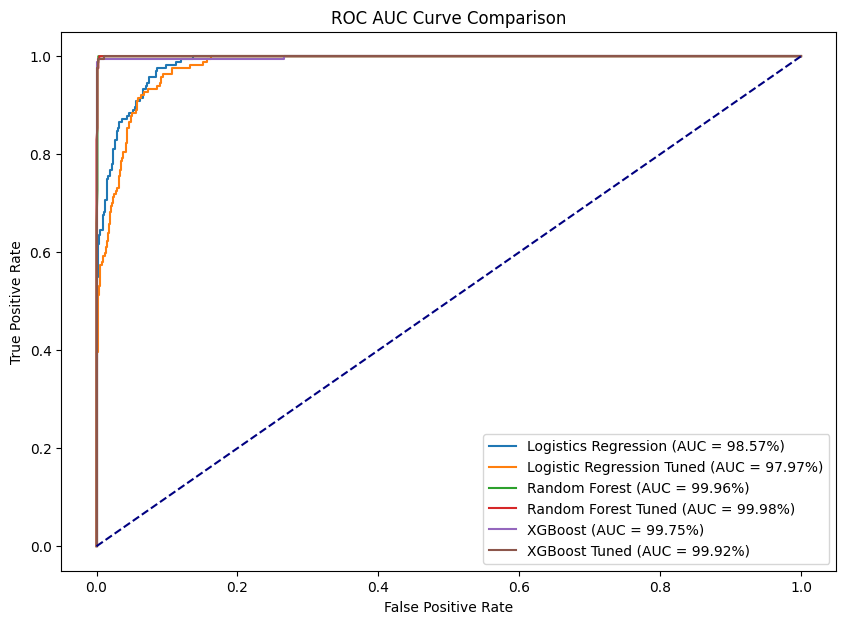

In [32]:
plot_roc_curves([logr_eval, logr_eval_tuned, rf_eval, rf_eval_tuned, xg_eval, xg_eval_tuned])

## Conclusion

When we started this project, our goal was to categorize asteroids based off simple features. This allows us to determine where we should focus our more expensive analysis. In the end we achieved a model with nearly 100% accuracy by utilizing the incredibly powerful Random Forest and XGBoost models. This was done through a few important steps:
1. Data Cleaning
    - In this step we removed unnecessary features that would have skewed our results including collinearity and bad values.
2. Outliers Analysis
    - This was another important step. It allowed us to check on what were the outliers in our dataset and gain a better overall understanding of the data. While we ultimately decided to leave the outliers this was highly important for the ML process.
3. ML Modeling
    - In this phase we implemented Logistics Regression, XGBoost, and Random Forest models along with tuned variants of the model.
    - The implementation of the tuning showed how powerful these models can be even without major tuning.
4. Evaluation
    - Evaluation was done using Recall and AUC Curves as the primary form of evaluation. Recall was chosen to help minimize False Negatives with AUC curves helping with overall performance.


### Future Improvements

This project can be improved in the future. Some area of improvements include further data gather and more in depth outlier analysis to see if removing outliers could help improve the model. Looking further into feature importance and potentially removing or adding features would also aid in improving the model.